# Chapter 9 Plotting and Visualization

In [2]:
# Import Series and DataFrame into local namespace
import numpy as np
import pandas as pd
from pandas import Series, DataFrame
# Import Matplotlib
import matplotlib.pyplot as plt

## Problem 1

#### In this problem, you are going to create a simple plot using numpy with the numbers 0-9. Use np.arange(10) to create the numbers in this, then dislpay data and then plot it. 

In [3]:
# Insert commenting and code in this cell.
#assigning a range of values to a variable.
data = np.arange(10)
#Displaying the contents of the data variable.
data

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

## Problem 2

#### In this problem, you will follow the example on textbook page 267 heading "Setting the title, axis labels, ticks, and ticklabels.<br>
This starts with lines In[39] through In[45]<br>
Also, save this to a file named problem_2.png - hint this is covered in the heading "Saving PLots to File - <strong>(don't forget to submit this file)</strong>

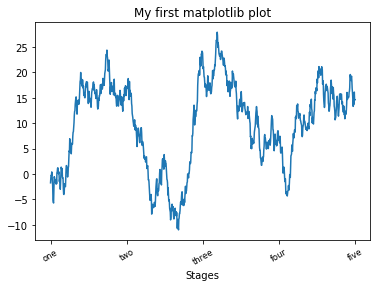

In [4]:
# Insert commenting and code in this cell.

#Creating a plt figure and adding sub plots.
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.plot(np.random.randn(1000).cumsum())
#Changing the x axis. Placing ticks along the data range.
ticks = ax.set_xticks([0, 250, 500, 750, 1000])
#Creating labels.
labels = ax.set_xticklabels(['one', 'two', 'three', 'four', 'five'],
                             rotation=30, fontsize='small')
#Setting the title for the axis.
ax.set_title('My first matplotlib plot')
#Giving a name to the x-axis.
ax.set_xlabel('Stages')


#BEGIN SAVING
#Saving the SVG version of a figure.
plt.savefig('figpath.svg')
#get the same plot as a PNG with minimal whitespace around the plot and at 400 DPI.
plt.savefig('figpath.png', dpi=400, bbox_inches='tight')
#Writing to bytesIO file object.
from io import BytesIO
#Assigning BytesIO to a variable.
buffer = BytesIO()
#Saving the buffer to a plot.
plt.savefig(buffer)
plot_data = buffer.getvalue()
#END OF SAVING


## Problem 3

#### In this problem, you will plot with pandas. Let's use the example from page 278, but change the Index values to E, F, G and H. and change the name of the legend to Problem 3. This uses In [71] and In [72].<br>
Make sure the print the contents of df on one line and then the plot on a separate line.

In [4]:
# Insert commenting and code in this cell.
#Creating the dataframe
df = pd.DataFrame(np.random.rand(6, 4),
                  index=['one', 'two', 'three', 'four', 'five', 'six'],
                  columns=pd.Index(['E', 'F', 'G', 'H'], name='Genus'))
#Dsplaying the dataframe.
df

Genus,E,F,G,H
one,0.225513,0.587149,0.712933,0.133756
two,0.821754,0.628311,0.208882,0.747289
three,0.093423,0.015712,0.822143,0.923449
four,0.523635,0.171268,0.104821,0.986011
five,0.505842,0.358184,0.157344,0.559614
six,0.574132,0.665180,0.756840,0.775658


## Problem 4

#### In this problem, you will read in the file macrodata.csv (attached in assignment along with being available in week 4). Follow the steps (textbook pages 286-288) under heading scatter or Point Plots.<br>
run import seaborn as sns first

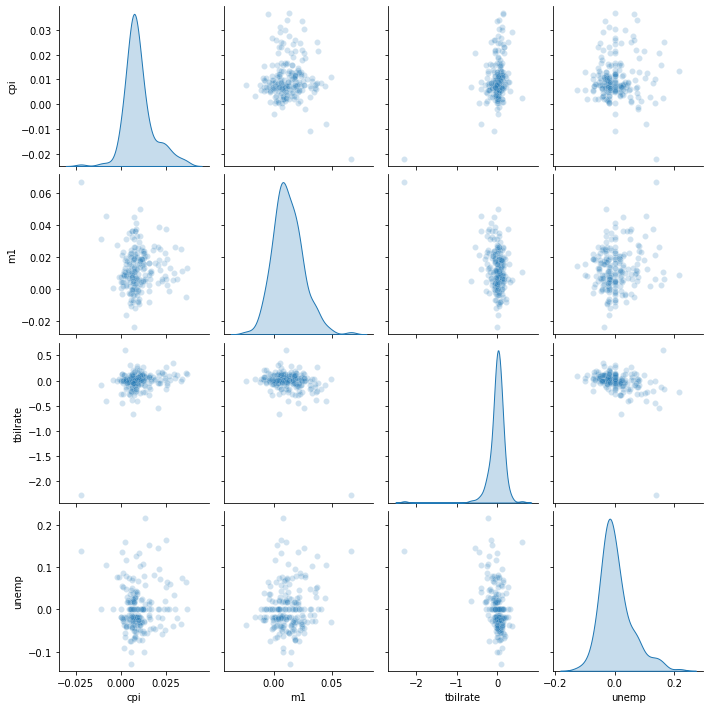

In [21]:
# Insert commenting and code in this cell.
#Importing library.
import seaborn as sns
#Reading the csv file and assigning it to a variable called macro.
macro = pd.read_csv('macrodata.csv')
#Assigning a macro of a list to the variable data.
data = macro[['cpi', 'm1', 'tbilrate', 'unemp']]
#Assigning a log of the macro to a variable called trans_data.
trans_data = np.log(data).diff().dropna()
#Displaying the value in the dictionary that is in the 5th to last position.
trans_data[-5:]
#Pairing plots from scratch.
sns.pairplot(trans_data, diag_kind='kde', plot_kws={'alpha': 0.2})


# Chapter 10 Data Aggregation and Group Operations

## Problem 5

#### In this problem, you will complete the steps on page 295 for In [12] - In [16]. 

In [6]:
# Insert commenting and code in this cell.
#Creating a dataframe.
df = pd.DataFrame({'key1' : ['a', 'a', 'b', 'b', 'a'],
                    'key2' : ['one', 'two', 'one', 'two', 'one'],
                    'data1' : np.random.randn(5),
                    'data2' : np.random.randn(5)})
#Displaying the dataframe.
df
#Grouping the dataframe by data1 column and by key 1.
grouped = df['data1'].groupby(df['key1'])
#Displaying the contents of grouped.
grouped
#Displaying the mean of grouped.
grouped.mean()

key1
a    1.243949
b    0.407798
Name: data1, dtype: float64

## Problem 6

#### In this problem,  you will work on "Example: Filling Missing Values with Group-Specific Values" on pages 312-314)

In [7]:
# Insert commenting and code in this cell.
#Filling in a series with random values and assigning it to a variable.
s = pd.Series(np.random.randn(6))
#Populating every 2nd value with Nan.
s[::2] = np.nan
#Printing out the series.
s
#Replacing the NaN value with the mean.
s.fillna(s.mean())
#Sample data of US states in the western and eastern regions.
states = ['Ohio', 'New York', 'Vermont', 'Florida',
          'Oregon', 'Nevada', 'California', 'Idaho']
#Creating 2 sets of keys.
group_key = ['East'] * 4 + ['West'] * 4
#Creating a new series with the states as the indices.
data = pd.Series(np.random.randn(8), index=states)
#Printing the new Series.
data
#Setting specific data points to show up as NaN.
data[['Vermont', 'Nevada', 'Idaho']] = np.nan
#Printing out the updated series.
data
#Grouping the keys by the mean.
data.groupby(group_key).mean()
#Filling with na values.
fill_mean = lambda g: g.fillna(g.mean())
#Grouping the data by the keys.
data.groupby(group_key).apply(fill_mean)
#Filling values.
fill_values = {'East': 0.5, 'West': -1}
#Performing the lambda operation for random operations to perform.
fill_func = lambda g: g.fillna(fill_values[g.name])
#Grouping the data by the key value.
data.groupby(group_key).apply(fill_func)

Ohio         -1.577067
New York      0.139546
Vermont       0.500000
Florida      -1.464450
Oregon       -0.088930
Nevada       -1.000000
California   -0.716308
Idaho        -1.000000
dtype: float64

## Problem 7

#### In this problem,  you will work on "Example: Random Sampling and Permutation" on pages 314-316)

In [22]:
# Insert commenting and code in this cell.
#Creating a list of card types.
suits = ['H', 'S', 'C', 'D']
#Creating generic lists out of a range of values.
card_val = (list(range(1, 11)) + [10] *3 ) * 4
#Creating base names for the cards.
base_names = ['A'] + list(range(2,11)) + ['J', 'K', 'Q']
#Creating a blank list to hold the values of the cards.
cards = []
#Creating a for loop to insert each card inside of the list.
for suit in ['H', 'S', 'C', 'D']:
    cards.extend(str(num) + suit for num in base_names)
#Creating a series and assigning it to a variable called deck.
deck = pd.Series(card_val, index=cards)
#Printing out the last 13 cards.
deck[:13]
#Creating a function to draw 5 cards from the deck.
def draw(deck, n=5):
    return deck.sample(n)
#Calling the newly created function and applying it to our custom built deck.
draw(deck)
#Grabbing the last card in the deck.
get_suit = lambda card: card[-1]
#Drawing 2 random cards from each suite.
deck.groupby(get_suit).apply(draw, n=2)
#Alternate method.
deck.groupby(get_suit, group_keys=False).apply(draw, n=2)

10C    10
QC     10
9D      9
AD      1
5H      5
8H      8
KS     10
9S      9
dtype: int64

## Problem 8

#### In this problem,  you will work on "Example: Group Weighted Average and Correlation" on pages 316-317 - stop at "As another example...")

In [6]:
# Insert commenting and code in this cell.
#Creating a dataframe.
df = pd.DataFrame({'category': ['a', 'a', 'a', 'a',
                                'b', 'b', 'b', 'b'],
                                'data': np.random.randn(8),
                                'weights': np.random.rand(8)})
#Printing the dataframe.
df
#Grouping the category column and printing the dataframe 
# by the order it is in and assigning it to a variable.
grouped = df.groupby('category')
#Grabbing the averages of the other categories.
get_wavg = lambda g: np.average(g['data'], weights=g['weights'])
#Using the apply function.
grouped.apply(get_wavg)


category
a   -0.110088
b    0.673385
dtype: float64

## Problem 9

#### In this problem, you will need the file tips.csv (included in the assignment zip file). You will be creating a pivot table. You want to compute a table of group means arranged by day and smoker on the rows (textbook page 319 - In [132].

In [36]:
# Insert commenting and code in this cell.
#Reading a csv and assigning it to a variable.
tips = pd.read_csv('tips.csv')
#Adding the percentage of the total bill.
tips['tip_pct'] = tips['tip'] / tips['total_bill']
#Displaying the first 6 elements.
tips[:6]
#Grouping by 
#Creating the pivot table.
tips.pivot_table(index=['day', 'smoker'])
#Adding another column.
tips.pivot_table(['tip_pct', 'size'], index=['time', 'day'],
                  columns='smoker')
#Creating a pivot table with margins set to true.
tips.pivot_table(['tip_pct', 'size'], index=['time', 'day'],
                  columns='smoker', margins=True)
#Using a different aggregation function.
tips.pivot_table('tip_pct', index=['time', 'smoker'], columns='day',
                  aggfunc=len, margins=True)
#Swapping empty and NA combinations using fill_value.
tips.pivot_table('tip_pct', index=['time', 'size', 'smoker'],
                  columns='day', aggfunc='mean', fill_value=0)






day                      Fri       Sat       Sun      Thur
time   size smoker                                        
Dinner 1    No      0.000000  0.137931  0.000000  0.000000
            Yes     0.000000  0.325733  0.000000  0.000000
       2    No      0.139622  0.162705  0.168859  0.159744
            Yes     0.171297  0.148668  0.207893  0.000000
       3    No      0.000000  0.154661  0.152663  0.000000
            Yes     0.000000  0.144995  0.152660  0.000000
       4    No      0.000000  0.150096  0.148143  0.000000
            Yes     0.117750  0.124515  0.193370  0.000000
       5    No      0.000000  0.000000  0.206928  0.000000
            Yes     0.000000  0.106572  0.065660  0.000000
       6    No      0.000000  0.000000  0.103799  0.000000
Lunch  1    No      0.000000  0.000000  0.000000  0.181728
            Yes     0.223776  0.000000  0.000000  0.000000
       2    No      0.000000  0.000000  0.000000  0.166005
            Yes     0.181969  0.000000  0.000000  0.158843
       3    No      0.187735  0.000000  0.000000  0.084246
            Yes     0.000000  0.000000  0.000000  0.204952
       4    No      0.000000  0.000000  0.000000  0.138919
            Yes     0.000000  0.000000  0.000000  0.155410
       5    No      0.000000  0.000000  0.000000  0.121389
       6    No      0.000000  0.000000  0.000000  0.173706

## Problem 10

#### In this problem, let's complete the the stps to only aggregate tip_pct (see page 282 to include code for tip_pct) and size from Problem 9. 

In [12]:
# Insert commenting and code in this cell.
#Grouping the tips and size.
grouped.agg({'tip' : np.max, 'size' : 'sum'})
#Displaying more useful values.
grouped.agg({'tip_pct' : ['min', 'max', 'mean', 'std'],
             'size' : 'sum'})

tip_pct                               size
                  min       max      mean       std  sum
day  smoker                                             
Fri  No      0.120385  0.187735  0.151650  0.028123    9
     Yes     0.103555  0.263480  0.174783  0.051293   31
Sat  No      0.056797  0.291990  0.158048  0.039767  115
     Yes     0.035638  0.325733  0.147906  0.061375  104
Sun  No      0.059447  0.252672  0.160113  0.042347  167
     Yes     0.065660  0.710345  0.187250  0.154134   49
Thur No      0.072961  0.266312  0.160298  0.038774  112
     Yes     0.090014  0.241255  0.163863  0.039389   40